In [1]:
%cd ..
from notebooks import nb_utils
nb_utils.assert_cwd_is_bmeg()



/home/jovyan/work/bmeg_etl


In [2]:

from transform.pdc.pdc_transformer import PDCTransformer
from transform.tcia.tcia_transformer import TCIATransformer
from transform.gdc.gdc_transformer import GDCTransformer
from transform.cda.cda_transformer import CDATransformer

from notebooks.graph_summarizer import summarize_graph, draw_summary

tcia = TCIATransformer().graph()
pdc = PDCTransformer().graph()
gdc = GDCTransformer().graph()


cda_transformer = CDATransformer(tcia=tcia, pdc=pdc, gdc=gdc)
cda = cda_transformer.graph()


using default gid factory for 'PfamClan'
using default gid factory for 'Sample'
using default gid factory for 'GeneOntologyTerm'
using default gid factory for 'Case'
using default gid factory for 'Aliquot'
using default gid factory for 'ProteinStructure'
using default gid factory for 'TranscriptExpression'
using default gid factory for 'Compound'
using default gid factory for 'Methylation'
using default gid factory for 'CopyNumberAlteration'
using default gid factory for 'GeneExpression'
using default gid factory for 'MethylationProbe'
using default gid factory for 'PfamFamily'
using default gid factory for 'Project'
using default gid factory for 'Program'
using default gid factory for 'Phenotype'
using default gid factory for 'Command'
using default gid factory for 'File'


18201
31018
121159
all_cases 977
all_programs 2
all_studies 20
all_files 37099
pdc_gdc_intersection: 211 tcia_gdc_intersection: 1877 pdc_tcia_gdc_intersection: 0


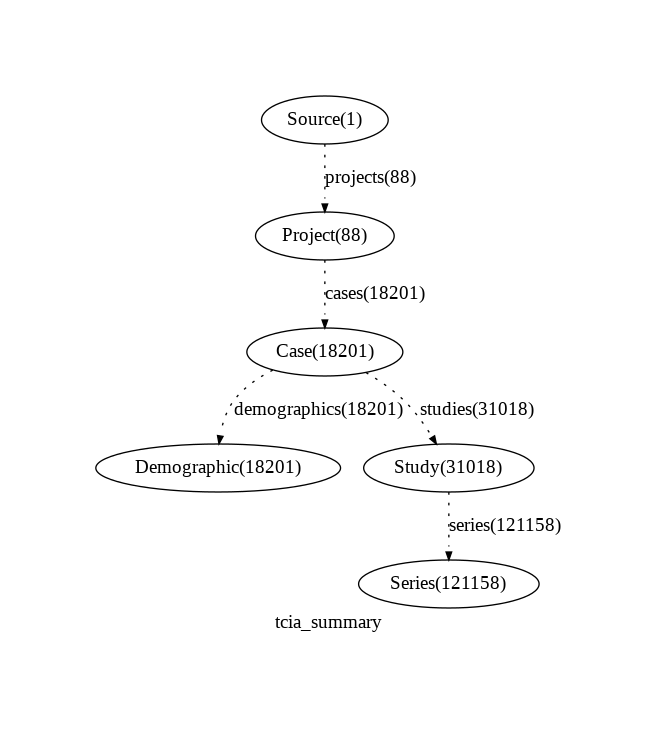

In [3]:
draw_summary(summarize_graph(tcia), 'tcia_summary')

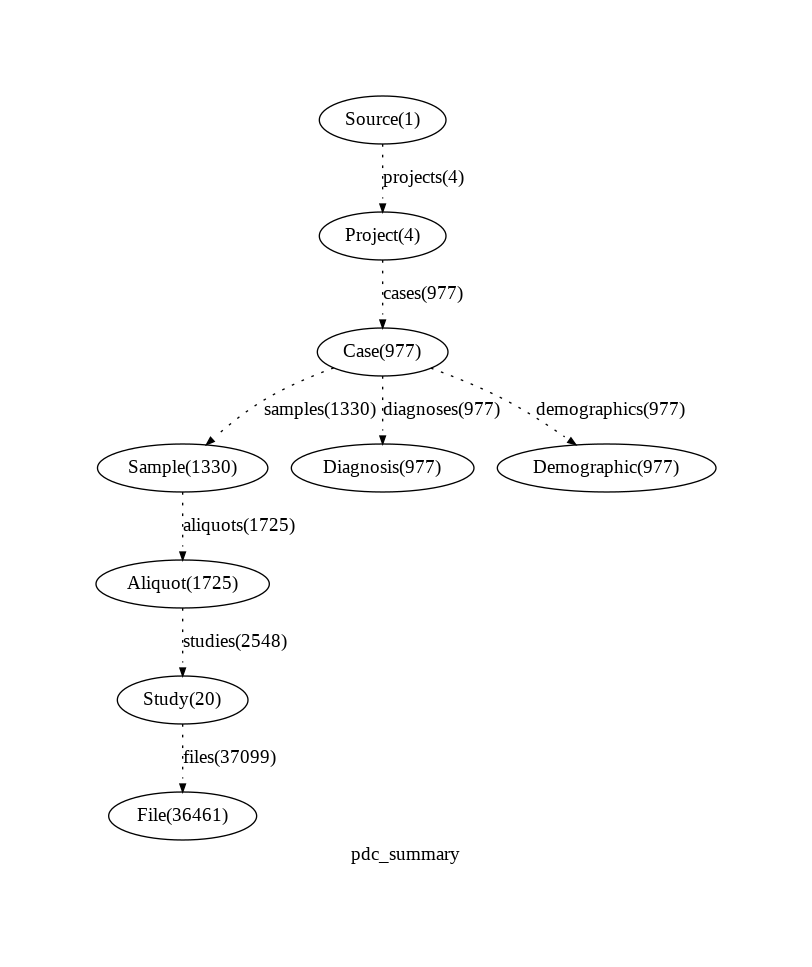

In [4]:
draw_summary(summarize_graph(pdc), 'pdc_summary')

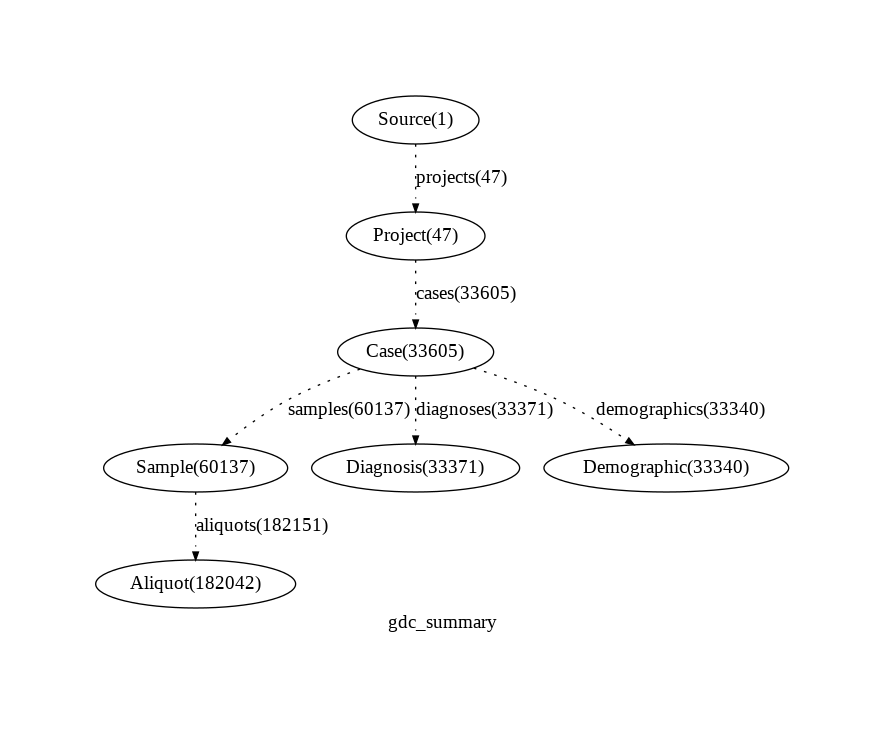

In [5]:
draw_summary(summarize_graph(gdc), 'gdc_summary')

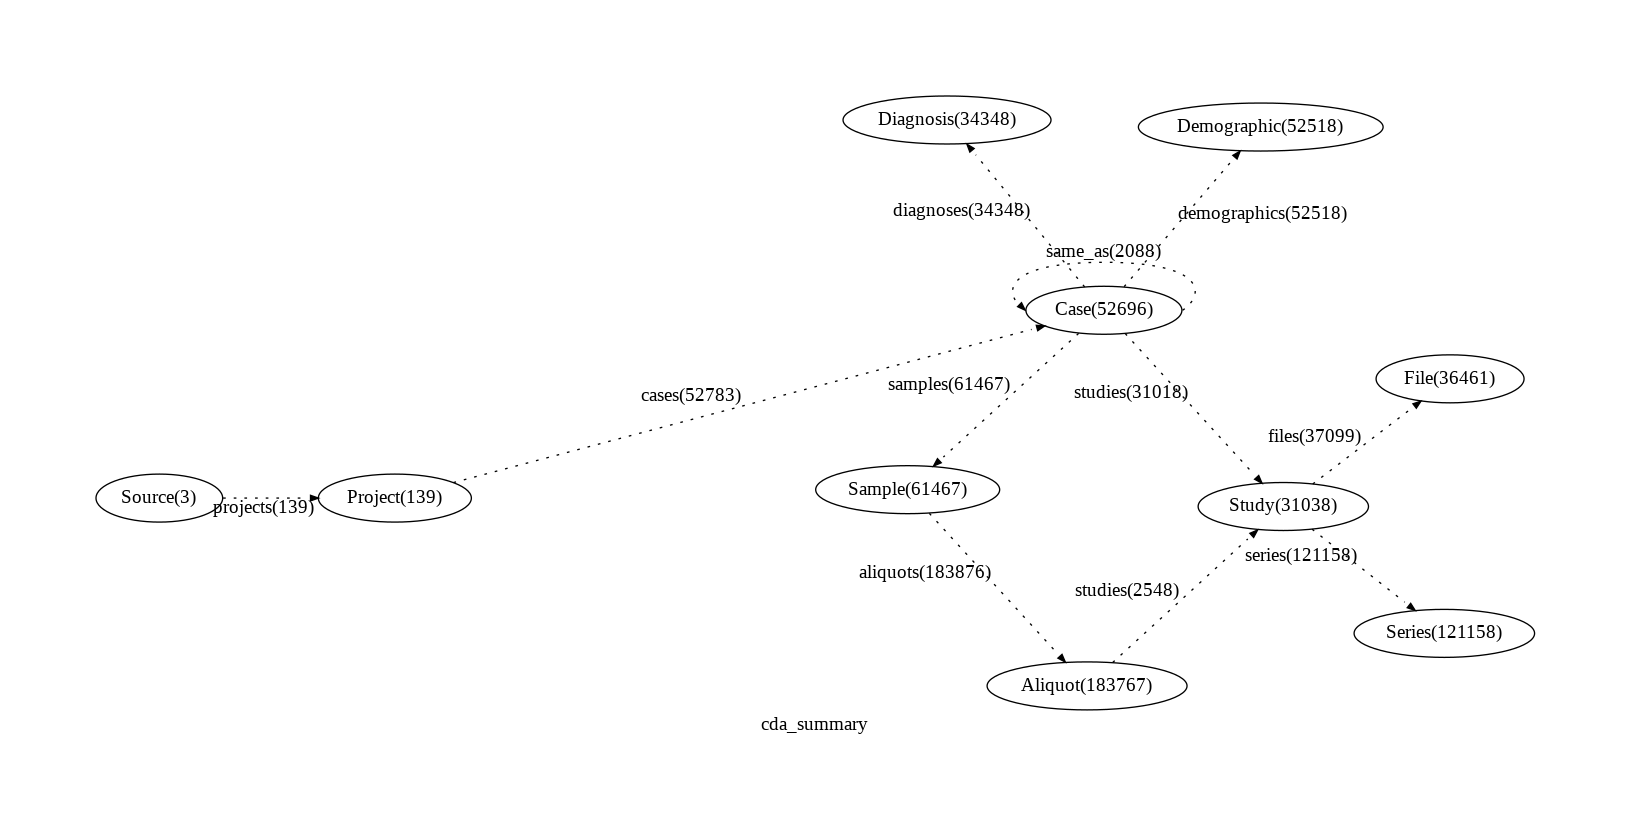

In [6]:
draw_summary(summarize_graph(cda), 'cda_summary', prog='circo')


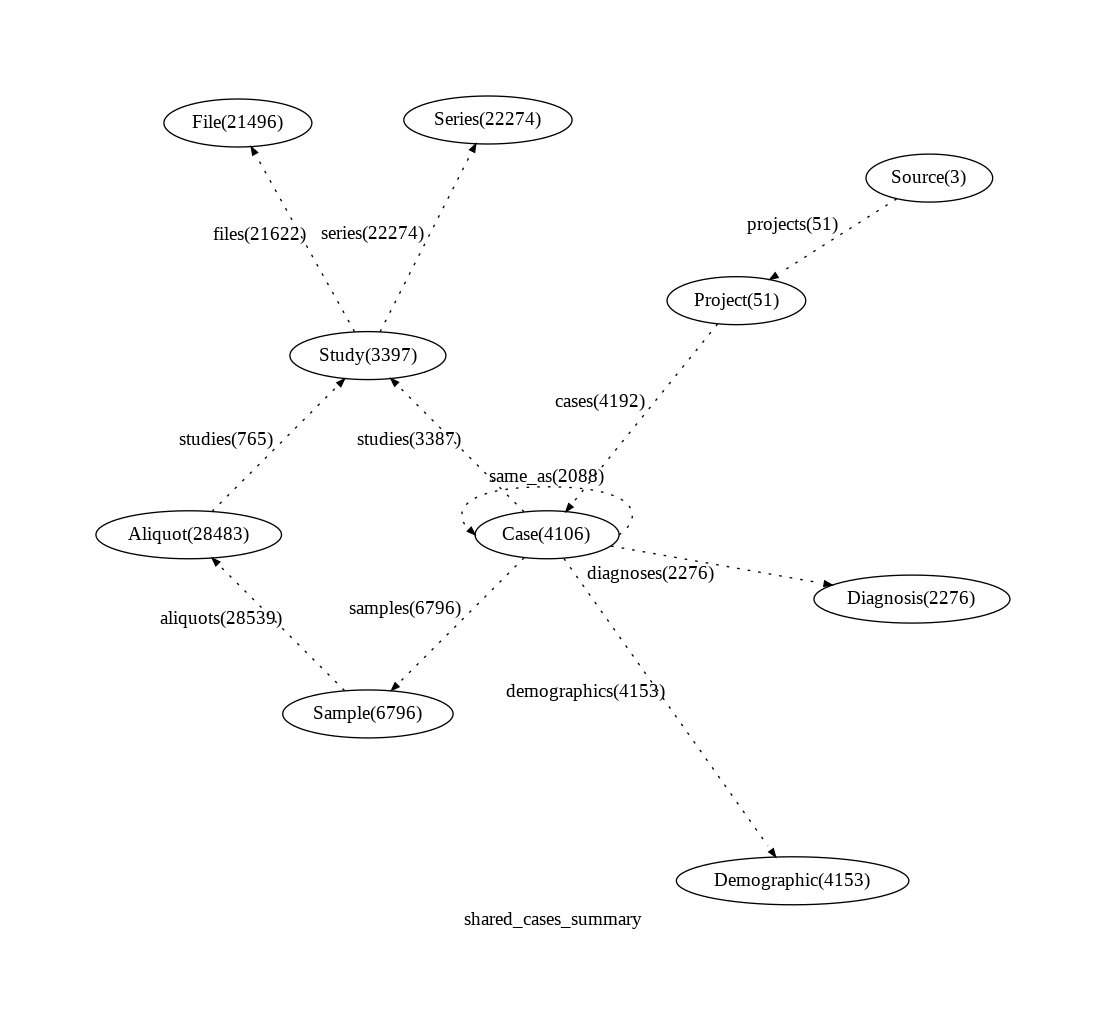

In [7]:
same_as_graph = cda_transformer.same_as_graph()
draw_summary(summarize_graph(same_as_graph), 'shared_cases_summary', prog='circo')



In [8]:

import pandas as pd

pd.DataFrame([(k,v) for k, v in cda_transformer.shared_cases_summary().items()], columns=['project_pair', 'shared_cases'] ).set_index('project_pair').sort_values(by='shared_cases', ascending=False)


,shared_cases
project_pair,
gdc.Project:TCGA-KIRC/tcia.TCGA-KIRC,267
gdc.Project:TCGA-GBM/tcia.TCGA-GBM,262
gdc.Project:TCGA-HNSC/tcia.TCGA-HNSC,226
gdc.Project:CPTAC-3/pdc.PJ-CPTAC3,211
gdc.Project:TCGA-LGG/tcia.TCGA-LGG,197
gdc.Project:TCGA-BRCA/tcia.TCGA-BRCA,125
gdc.Project:TCGA-BLCA/tcia.TCGA-BLCA,106
gdc.Project:TCGA-OV/tcia.TCGA-OV,105
gdc.Project:TCGA-LIHC/tcia.TCGA-LIHC,97
